**SIMULACIÓN TRANSPORTE EN BOGOTÁ**

Un modelo de AC puede ser utilizado para simular el transporte en Bogotá dividiendo la ciudad en una cuadrícula de celdas, donde cada celda representa una intersección o una sección de una calle. Las reglas del modelo podrían incluir los siguientes aspectos:


*   Densidad de tráfico: Cada celda podría tener un valor de densidad de tráfico que varía de bajo a alto, dependiendo de la cantidad de vehículos que pasan por ella en un momento dado. La densidad de tráfico podría afectar la velocidad de los vehículos y el flujo de tráfico en la celda.

*   Flujo de tráfico: Cada vehículo en el modelo se movería de una celda a otra, siguiendo las reglas de tráfico en Bogotá. Estas reglas podrían incluir la dirección del tráfico, las restricciones de giro, las señales de tráfico y las velocidades límite en cada calle.

*   Accidentes y obstáculos: El modelo también podría incluir obstáculos aleatorios como accidentes de tráfico, construcciones o reparaciones de carreteras, que podrían afectar el flujo de tráfico y crear congestiones.

*   Tiempo: El modelo podría tener un valor de tiempo que se actualiza en cada iteración y que se utiliza para simular el tiempo que tardan los vehículos en llegar de una celda a otra.


*   Interacción de vehículos: El modelo también podría tener reglas para la interacción entre vehículos, como la distancia mínima entre ellos o la necesidad de ceder el paso en determinadas situaciones.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

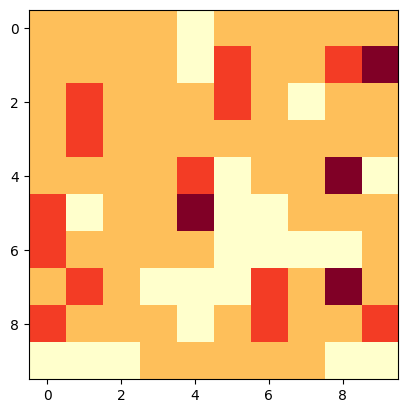

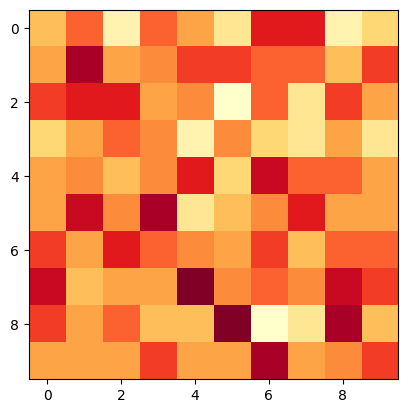

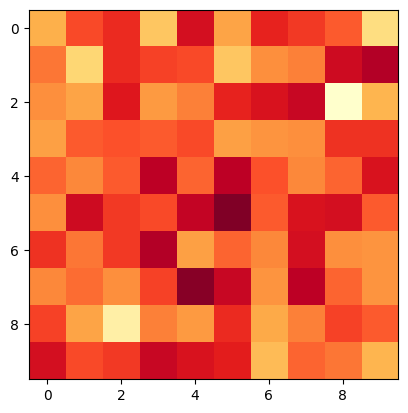

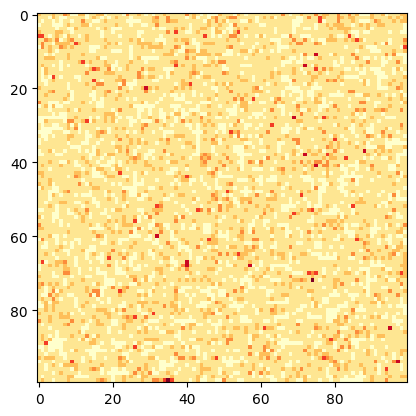

In [4]:
class BogotaTransport:
    def __init__(self, n, width, height):
        self.n = n
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))
        self.time = 0
        self.agents = []

    def step(self):
        self.time += 1
        random.shuffle(self.agents)
        for agent in self.agents:
            x, y = agent.position
            dx, dy = agent.direction
            next_x, next_y = x + dx, y + dy
            if not (0 <= next_x < self.width and 0 <= next_y < self.height):
                # agente alcanzó el límite del mapa, lo eliminamos
                self.agents.remove(agent)
            elif self.grid[next_y, next_x] > 0:
                # hay otro agente en la siguiente celda, el actual debe detenerse
                agent.speed = 0
            else:
                # movemos el agente a la siguiente celda
                agent.position = (next_x, next_y)
                self.grid[y, x] -= 1
                self.grid[next_y, next_x] += 1
                agent.speed = 1

    def add_agent(self, agent):
        self.agents.append(agent)
        x, y = agent.position
        self.grid[y, x] += 1

    def visualize(self):
        plt.imshow(self.grid, cmap='YlOrRd', interpolation='nearest')
        plt.show()


class Agent:
    def __init__(self, model, position):
        self.model = model
        self.position = position
        self.speed = 1
        self.direction = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])
        self.model.add_agent(self)

    def step(self):
        self.speed = 1

if __name__ == '__main__':
    # definimos el modelo
    model = BogotaTransport(n=100, width=10, height=10)
    # creamos los agentes
    for i in range(model.n):
        x, y = random.randrange(model.width), random.randrange(model.height)
        Agent(model, (x, y))
    # ejecutamos el modelo por 10 pasos
    for i in range(10):
        model.step()
    # visualizamos el resultado
    model.visualize()

    # definimos el modelo
    model = BogotaTransport(n=1000, width=10, height=10)
    # creamos los agentes
    for i in range(model.n):
        x, y = random.randrange(model.width), random.randrange(model.height)
        Agent(model, (x, y))
    # ejecutamos el modelo por 10 pasos
    for i in range(10):
        model.step()
    # visualizamos el resultado
    model.visualize()

    # definimos el modelo
    model = BogotaTransport(n=10000, width=10, height=10)
    # creamos los agentes
    for i in range(model.n):
        x, y = random.randrange(model.width), random.randrange(model.height)
        Agent(model, (x, y))
    # ejecutamos el modelo por 10 pasos
    for i in range(10):
        model.step()
    # visualizamos el resultado
    model.visualize()

    # definimos el modelo
    model = BogotaTransport(n=10000, width=100, height=100)
    # creamos los agentes
    for i in range(model.n):
        x, y = random.randrange(model.width), random.randrange(model.height)
        Agent(model, (x, y))
    # ejecutamos el modelo por 10 pasos
    for i in range(10):
        model.step()
    # visualizamos el resultado
    model.visualize()

Las variables en el programa de python fueron declaradas como: 

n: Es el número de agentes en el modelo.
width: Es el ancho de la cuadrícula en la que se modela la ciudad de Bogotá.
height: Es la altura de la cuadrícula en la que se modela la ciudad de Bogotá.


Explicación breve:
Primero, se importan las librerías necesarias para el modelo, incluyendo la librería matplotlib para graficar la simulación.
Luego, se definen las variables y parámetros necesarios para el modelo, incluyendo el tamaño de la cuadrícula, el tiempo de la simulación, la densidad de tráfico inicial y la velocidad máxima permitida en la ciudad.
A continuación, se crea una lista de listas que representa la cuadrícula, donde cada celda es inicializada con la densidad de tráfico inicial. Luego, se utiliza un ciclo while para simular el paso del tiempo en la ciudad.
En cada iteración del ciclo, se recorre cada celda de la cuadrícula y se calcula la velocidad de los vehículos en la celda en función de la densidad de tráfico y la velocidad máxima permitida. Luego, se actualiza la posición de cada vehículo en la celda y se verifica si hay accidentes u obstáculos que puedan afectar el flujo de tráfico.
Finalmente, se grafica la simulación utilizando la librería matplotlib, donde cada vehículo se representa como un punto en la cuadrícula y su color varía según su velocidad en relación con la velocidad máxima permitida.
En resumen, este código es un modelo básico de Autómatas Celulares que simula el tráfico en una cuadrícula de celdas, con reglas simples que tienen en cuenta la densidad de tráfico, la velocidad máxima permitida y la presencia de obstáculos o accidentes.
